### Implement steps:
1. read data from csv file
2. drop the 'sex' column (since it is unrelated)
3. change age "110+" to "100" for conveniently type casting (from str to int)
4. type of 'age' converted to 'int' for convenient comparison

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')

df.drop(columns=['sex'], inplace=True)

df.loc[df.loc[:, 'age'] == "110+", 'age'] = "110"

df['age'] = df['age'].astype('int32')

2. divide rows into different groups(children, elderly, and labor force) according to 'age' attribute
3. drop 'age' column, since rows are grouped and thus 'age' becomes redundant
4. for each group, apply 'sum' function to calculate the total population of this group for every year

In [3]:
labor_force_s = df[(df['age'] >= 15) & (df['age'] <= 64)].drop('age', axis=1).apply(sum)

children_s = df[df['age'] < 15].drop('age', axis=1).apply(sum)

elderly_s = df[df['age'] >= 65].drop('age', axis=1).apply(sum)

### Question 1
calculate depencency ratio for every year, and draw the plot

Text(0.5, 1.0, 'Dependency ratio of Sweden from 1860 to 2022')

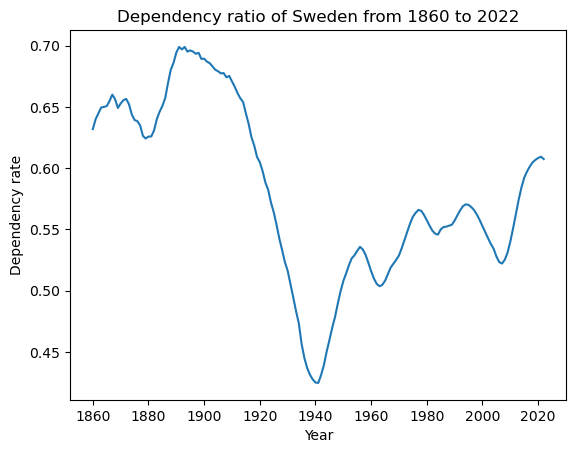

In [4]:
dependency_ratio_s = ((children_s + elderly_s) / labor_force_s)

plt.plot(dependency_ratio_s)
plt.xlabel('Year')
plt.ylabel('Dependency rate')
plt.xticks(range(0, 2022 - 1860, 20))
plt.title('Dependency ratio of Sweden from 1860 to 2022')

### Question 2
calculate the fraction of the children, the elderly, and the total dependent population of the total Swedish population from 1860
to 2022

Text(0.5, 1.0, 'Fraction of the children, the elderly, and\nthe dependent population of the total Swedish population from 1860\nto 2022')

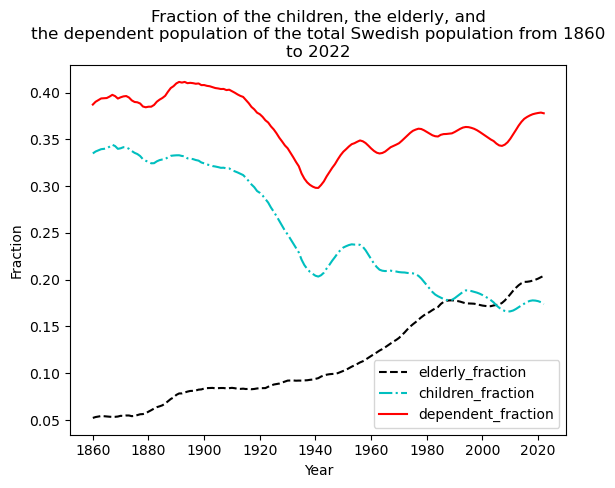

In [7]:
total_population_s = labor_force_s + children_s + elderly_s

elderly_fraction_s = elderly_s / total_population_s

children_fraction_s = children_s / total_population_s

dependent_fraction_s = elderly_fraction_s + children_fraction_s


plt.plot(elderly_fraction_s, '--k',label="elderly_fraction")
plt.plot(children_fraction_s, '-.c',label="children_fraction")
plt.plot(dependent_fraction_s, '-r',label="dependent_fraction")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Fraction')
plt.xticks(range(0, 2022 - 1860, 20))
plt.title('''Fraction of the children, the elderly, and
the dependent population of the total Swedish population from 1860
to 2022''')

### Question 3

Discuss the development of the Swedish population in light of these figures;
how have the Swedish demographics changed over the years and why, and
relate this to what you know (or can find out) about general trends of
population among industrialized countries.


#### 3.1 Swedish demographics changes over the years
##### 3.1.1. For dependency ratio of Sweden from 1860 to 2022
1. Trend: Before the 20th century, the dependency ratio remained high, reaching a peak close to 0.70 in around 1890. But starting in the 20th century, the dependency ratio dropped dramatically, reaching a low point at approximate 0.41 in around 1940. After 1940, although with several small fluctuations, the dependency ratio was generally increasing, reaching closely to 0.60 by 2022.

2. Reason: Before the 20th century, the total dependency ratio was very high because of a largely agricultural society with many children and high birth rates. From 1890 to 1940, the total dependency ratio dramatically decreased since the labor force population remained large due to high birth rate in the past decades, and the birth rate kept going down due to industrialization and urbanization. However, from the 1960s to 2022, the dependency ratio began rising again as the country faced a growing aging population.

##### 3.1.2. For children and elderly population of Sweden from 1860 to 2022
1. Trend: Between 1860 and 2022, the children's proportion declined significantly from around 0.35 to 0.15; the elderly population proportion gradually increased from around 0.05 to 0.20. 

2. Reason: After the second industrial revolution in the early 20th century, public health improvements better living conditions have led to increased life expectancy. This fact combined with the high birth rate in the early 20th century contributes to the increasing trend of elderly population propotion. Besides, between 1940 and 1980, European countries experienced rapid industrialization and urbanization, which increased the costs of living and child-rearing and reduced the birth rate. Therefore, the ratio of children population went down greatly.

#### 3.2 General trends of population among industrialized countries
1. The proportion of elderly individuals is increasing significantly. 
2. The proportion of children is decreasing steadily.
3. The proportion of dependent population is increasing due to the significant growth of elderly population and the predictable lack of labor force popultion caused by the low birth rate in the past decades.